In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('datos.csv', sep=",")
df['Mes'] = pd.to_datetime(df['Fecha'], format='%Y-%m-%d').dt.strftime('%m').astype('int')
#df=df.loc[(df['Hora'] >=18) & (df['Hora'] <=23)]

X, y = df[['Temperatura','Hora']], df['Radiacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig, axes = plt.subplots(4, 2, figsize=(12, 15), sharex=True)
fig.suptitle('Análisis Comparativos de Modelos')

models = [
    ("Linear Regression", LinearRegression(), axes[0,0]),
    ("Polynomial Regression", PolynomialFeatures(degree=2), axes[0,1]),
    ("K-Nearest Neighbors", KNeighborsRegressor(algorithm='auto', metric='euclidean', weights='distance', n_neighbors=10),axes[1,0]),
    ("Decision Tree Regressor", DecisionTreeRegressor(max_depth=3, random_state=42), axes[1,1]),
    ("SVR Kernel Lineal", SVR(kernel='linear'), axes[2,0]),
    ("SVR Kernel RBF", SVR(kernel='poly'), axes[2,1]),
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100, random_state=42), axes[3,0]),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, random_state=42, max_depth=5),axes[3,1])
]

results = []
for name, model, _ax in models:
    if name == "Polynomial Regression":
        model = LinearRegression()
        X_train_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
        X_test_poly = PolynomialFeatures(degree=2).fit_transform(X_test)
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    elif name == "SVR Kernel Lineal" or name == "SVR Kernel RBF":
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    if name == "Linear Regression":
      print('Linear Regression Parámetros\n')
      print('Intercept: \n', model.intercept_)
      print('Coeficientes: \n', model.coef_)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = math.sqrt(mse)
    results.append((name, mse, rmse, mae, r2))

    sns.scatterplot(ax=_ax, x=X_test['Hora'], y=y_test, color='black', label='Real')
    sns.scatterplot(ax=_ax, x=X_test['Hora'], y=y_pred,  color='red', label='Predicted')
    _ax.set_title(name + ' $R^2$=%.2f' %r2 + ' MSE=%.2f' %mse)
    _ax.set_xlabel("Hour")
    _ax.set_ylabel("Radiation")
    _ax.legend()



# Imprimimos los resultados
print("Resultados de la comparativa:")
for name, mse, rmse, mae, r2 in results:
    print(f"Modelo: {name}")
    print(f"  Error cuadrático medio (MSE): {mse:.2f}")
    print(f"  Raíz del Error cuadrático medio (MSE): {rmse:.2f}")
    print(f"  Error absoluto medio (MAE): {mae:.2f}")
    print(f"  Coeficiente de determinación (R2): {r2:.2f}")
    print("-" * 40)




In [ ]:
df = pd.DataFrame(results)
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(11, 7), sharex=True)

sns.lineplot(ax=axes[0,0],x=df[0], y=df[1], marker='o', markerfacecolor='limegreen', markersize=10).set(title='Mean Squared Error (MSE)', xlabel='Algorithm', ylabel='Value');
sns.lineplot(ax=axes[0,1],x=df[0], y=df[2], marker='o', markerfacecolor='limegreen', markersize=10).set(title='Root Mean Squared Error (RMSE)', xlabel='Algorithm', ylabel='Value');
sns.lineplot(ax=axes[1,0],x=df[0], y=df[3], marker='o', markerfacecolor='limegreen', markersize=10).set(title='Mean Absolute Error (MAE)', xlabel='Algorithm', ylabel='Value');
sns.lineplot(ax=axes[1,1],x=df[0], y=df[4], marker='o', markerfacecolor='limegreen', markersize=10).set(title='Coefficient of Determination $R^2$', xlabel='Algorithm', ylabel='Value');

sns.despine(left=True, bottom=True)
plt.xticks(range(8), ['RL','RP','KNN','DTree','SVR-L','SVR-P','RF','GB'])
plt.show()

In [ ]:
df.rename(columns={0:'Técnica',1:'MSE', 2:'r_MSE',3:'MAE',4:'R2'},inplace=True)
df.style.format(precision=3, thousands=".", decimal=",")

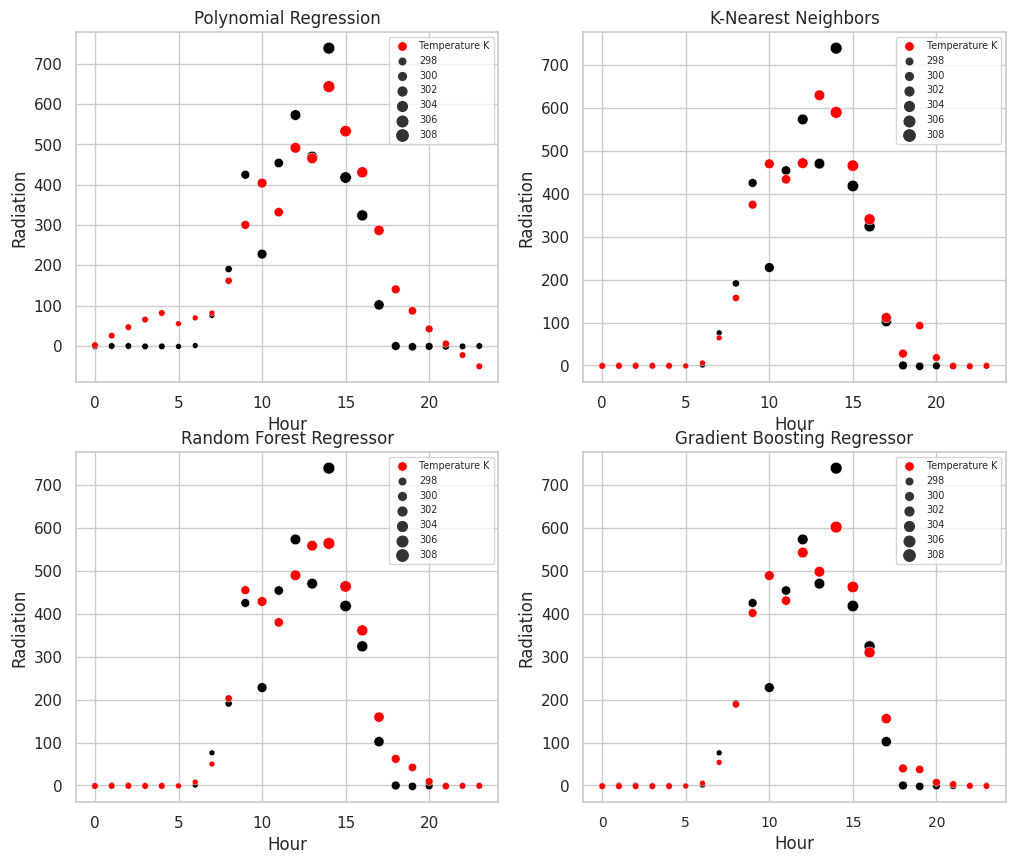

In [24]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
models = [
    ("Polynomial Regression", PolynomialFeatures(degree=2), axes[0,0]),
    ("K-Nearest Neighbors", KNeighborsRegressor(algorithm='auto', metric='euclidean', weights='distance', n_neighbors=10),axes[0,1]),
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100, random_state=42), axes[1,0]),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, random_state=42, max_depth=5),axes[1,1])
]

df = pd.read_csv('datos.csv', sep=",")
X, y = df[['Temperatura','Hora']], df['Radiacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

data_test = df.loc[(df['Fecha']=='2020-05-02') ]
data_test=data_test.groupby('Hora' , as_index=False).mean('Temperatura').astype(int)
X_test = data_test[['Temperatura','Hora']]
y_test = data_test['Radiacion']


for name, model, _ax in models:
    if name == "Polynomial Regression":
        model = LinearRegression()
        X_train_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
        X_test_poly = PolynomialFeatures(degree=2).fit_transform(X_test)
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    pickle.dump(model, open(name+'.model', 'wb'))
    sns.scatterplot(ax=_ax, x=X_test['Hora'], y=y_test,
                size=X_test['Temperatura'], color='black', legend=False)
    sns.scatterplot(ax=_ax, x=X_test['Hora'], y=y_pred,
                size=X_test['Temperatura'],color='red', label='Temperature K')
    _ax.set_title(name)
    _ax.set_xlabel("Hour")
    _ax.set_ylabel("Radiation")
    _ax.legend(fontsize='xx-small')

    plt.xticks(fontsize=10)




<ipython-input-106-49bf3d5f12b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


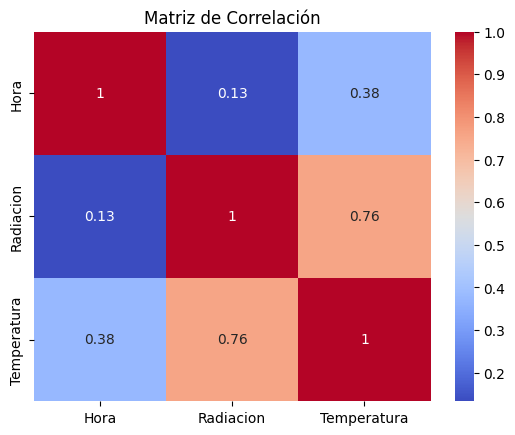

In [ ]:
df = pd.read_csv('datos.csv', sep=",")
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
fig, axes = plt.subplots(2,2, figsize=(12, 10))
fig.suptitle('Predicción de la radiación Solar en UTEQ :: Predicción Tiempo por Meteosource')
models = [
    ("Regresión Polinomial", PolynomialFeatures(degree=2), axes[0,0]),
    ("K-Nearest Neighbors", KNeighborsRegressor(algorithm='auto', metric='euclidean', weights='distance', n_neighbors=10),axes[0,1]),
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100, random_state=42), axes[1,0]),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, random_state=42, max_depth=5),axes[1,1])
]

df = pd.read_csv('datos.csv', sep=",")
X, y = df[['Temperatura','Hora']], df['Radiacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_test = pd.DataFrame(columns=['Temperatura','Hora'])

parameters = {'key': '',
             'place_id': 'quevedo',
              'timezone':'America/Guayaquil',
              'units':'metric',
              'sections':'current,hourly'}
datos  = requests.get("https://www.meteosource.com/api/v1/free/point", parameters).json()
datos_tiempo = pd.DataFrame(columns=['TemperaturaC', 'Temperatura', 'Hora', 'Fecha', 'FechaAbrev'])
for datos_hora in datos['hourly']['data']:
  fecha=datetime.strptime(datos_hora['date'],'%Y-%m-%dT%H:%M:%S')
  datos_tiempo.loc[len(datos_tiempo)] = [datos_hora['temperature'],datos_hora['temperature'] + 273.15,
                             fecha.hour, fecha.strftime('%Y-%m-%d'), fecha.strftime('%H')]

X_test = datos_tiempo[['Temperatura','Hora']]
for name, model, _ax in models:
    if name == "Regresión Polinomial":
        model = LinearRegression()
        X_train_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
        X_test_poly = PolynomialFeatures(degree=2).fit_transform(X_test)
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    sns.scatterplot(ax=_ax, x=datos_tiempo['Hora'], y=y_pred,
                hue=datos_tiempo['TemperaturaC'], size = datos_tiempo['TemperaturaC'])
    _ax.set_title(name)
    _ax.set_ylabel('Radiación')
    _ax.set_xlabel('Hora')
    _ax.tick_params(axis='x',labelsize=8)
